# Final Figure Keystone Cove

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import rasterio
from rasterio.plot import show

import geopandas as gpd
from shapely.geometry import Point

import cmocean
import cmocean.cm as cmo

from pyproj import Transformer
from scipy.interpolate import griddata
import xarray as xr
import utm

C:\Users\15093\anaconda3\envs\gpgn-318\Lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


# For Both

In [ ]:
tif = rasterio.open('Keystonetif.tif')

# dataframe for new dataframe (see judes total_df notQebook for addition of polygon location/measurement type and fins big_df notebook for all collected data)
total_df = pd.read_csv('total_df.csv')

In [7]:
# make dataframe for all of keystone measuremnts 
KEY_Full = total_df[total_df['Area'] == 'KEY']
# convert to from UTC to datetime to sort by date
KEY_Full['UTC Time'] = pd.to_datetime(KEY_Full['UTC Time'])
#KEY_Full
# make dataframe of keystone from the 18th
KEY_18 = KEY_Full[KEY_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-18').date()]

# put lat and lon into easting and northing

utm_coords = [utm.from_latlon(lat, lon) for lat, lon in zip(KEY_18['Latitude'], KEY_18['Longitude'])]

KEY_18['Easting']  = [c[0] for c in utm_coords]
KEY_18['Northing'] = [c[1] for c in utm_coords]

KEY_18

C:\Users\15093\AppData\Local\Temp\ipykernel_25888\872792797.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KEY_Full['UTC Time'] = pd.to_datetime(KEY_Full['UTC Time'])


,Unnamed: 0,Pressure (dbar),Depth (m),Temperature (°C),Conductivity (µS/cm),Specific Conductance (µS/cm),Salinity (PSS),Sound Velocity (m/s),Density (kg/m³),Latitude,Longitude,UTC Time,File Name,Area,Easting,Northing
2647,2647,0.150000,0.153173,11.130358,312.848145,432.943602,0.205595,1451.965568,999.756232,40.278164,-106.864994,2025-05-18 16:47:13,CC2435009_20250518_164713,KEY,341447.871639,4.460300e+06
2648,2648,0.450000,0.458888,11.190516,312.196616,431.323798,0.204842,1452.201414,999.750815,40.278164,-106.864994,2025-05-18 16:47:13,CC2435009_20250518_164713,KEY,341447.871639,4.460300e+06
2649,2649,0.750000,0.764815,11.183543,312.638727,432.017843,0.205175,1452.179773,999.753228,40.278164,-106.864994,2025-05-18 16:47:13,CC2435009_20250518_164713,KEY,341447.871639,4.460300e+06
2650,2650,1.050000,1.070740,11.139386,312.284655,432.055843,0.205166,1452.014304,999.759236,40.278164,-106.864994,2025-05-18 16:47:13,CC2435009_20250518_164713,KEY,341447.871639,4.460300e+06
2651,2651,1.350000,1.376664,11.116956,312.156525,432.146779,0.205195,1451.932593,999.763006,40.278164,-106.864994,2025-05-18 16:47:13,CC2435009_20250518_164713,KEY,341447.871639,4.460300e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,2796,0.750000,0.764813,11.095460,311.911028,432.064072,0.205144,1451.839903,999.762334,40.280965,-106.867086,2025-05-18 17:07:02,CC2435009_20250518_170702,KEY,341276.579854,4.460615e+06
2797,2797,1.050000,1.070735,11.054688,313.061999,434.148806,0.206133,1451.688397,999.768728,40.280965,-106.867086,2025-05-18 17:07:02,CC2435009_20250518_170702,KEY,341276.579854,4.460615e+06
2798,2798,1.350000,1.376655,10.959620,311.792631,433.531601,0.205774,1451.324766,999.779564,40.280965,-106.867086,2025-05-18 17:07:02,CC2435009_20250518_170702,KEY,341276.579854,4.460615e+06
2799,2799,1.650000,1.682572,10.908201,311.461150,433.690826,0.205818,1451.130237,999.786219,40.280965,-106.867086,2025-05-18 17:07:02,CC2435009_20250518_170702,KEY,341276.579854,4.460615e+06


# KEY for isobath

In [8]:
KEY_18_mod = KEY_18[KEY_18['Pressure (dbar)'] <= 4.95]
meanedT = KEY_18_mod['Temperature (°C)'].mean()

pressure_p15 = KEY_18[KEY_18['Pressure (dbar)'] == 0.15]
pressure_p75 = KEY_18[np.isclose(KEY_18['Pressure (dbar)'], 0.75)]
pressure_1p35 = KEY_18[KEY_18['Pressure (dbar)'] == 1.35]
pressure_4p95 = KEY_18[np.isclose(KEY_18['Pressure (dbar)'], 4.95)]

for df in [pressure_p15, pressure_1p35, pressure_4p95]:
    df['meantemp'] = df['Temperature (°C)'] - meanedT

pressure_4p95


C:\Users\15093\AppData\Local\Temp\ipykernel_25888\1790262720.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meantemp'] = df['Temperature (°C)'] - meanedT
C:\Users\15093\AppData\Local\Temp\ipykernel_25888\1790262720.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meantemp'] = df['Temperature (°C)'] - meanedT
C:\Users\15093\AppData\Local\Temp\ipykernel_25888\1790262720.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Unnamed: 0,Pressure (dbar),Depth (m),Temperature (°C),Conductivity (µS/cm),Specific Conductance (µS/cm),Salinity (PSS),Sound Velocity (m/s),Density (kg/m³),Latitude,Longitude,UTC Time,File Name,Area,Easting,Northing,meantemp
2663,2663,4.95,5.047580,10.231106,307.278029,436.089101,0.206535,1448.534378,999.867685,40.278164,-106.864994,2025-05-18 16:47:13,CC2435009_20250518_164713,KEY,341447.871639,4.460300e+06,-0.648592
2702,2702,4.95,5.047590,10.384191,308.130002,435.406313,0.206306,1449.137041,999.853290,40.277506,-106.865637,2025-05-18 16:50:29,CC2435009_20250518_165029,KEY,341391.650632,4.460228e+06,-0.495508
2721,2721,4.95,5.047603,10.439033,306.099992,431.868426,0.204621,1449.350381,999.846798,40.278290,-106.865860,2025-05-18 16:54:37,CC2435009_20250518_165437,KEY,341374.515418,4.460316e+06,-0.440665
2740,2740,4.95,5.047556,10.188253,306.117139,434.970645,0.205962,1448.364463,999.871157,40.278517,-106.865951,2025-05-18 16:57:12,CC2435009_20250518_165712,KEY,341367.315754,4.460341e+06,-0.691446


# KEY for Transcet

In [9]:
# find unique casts from keystone on the 18th
casts = KEY_18[['File Name', 'Easting', 'Northing']].drop_duplicates().reset_index(drop=True)

# find best fit line for transect with easting and northing
m, b = np.polyfit(casts['Easting'], casts['Northing'], 1)
# unit direction vector along that line
v = np.array([1.0, m])
v_unit = v / np.linalg.norm(v)
# choose a reference point on the line (when Easting=0 → Northing=b)
p0 = np.array([0.0, b])

# Project each cast onto the line:
# s_i = (p_i - p0) ⋅ v_unit   → distance along line in meters
XY = casts[['Easting', 'Northing']].to_numpy()
s_m = (XY - p0) @ v_unit
casts['distance_m'] = s_m - s_m.min()

df_KEY = KEY_18.merge(casts[['File Name', 'distance_m']], on='File Name')

# for dashed lines
depth_at_1_35 = df_KEY.loc[np.isclose(df_KEY['Pressure (dbar)'], 1.35, atol=0.01), 'Depth (m)'].mean()
depth_at_015 = df_KEY.loc[np.isclose(df_KEY['Pressure (dbar)'], 0.15, atol=0.01), 'Depth (m)'].mean()
depth_at_4_95 = df_KEY.loc[np.isclose(df_KEY['Pressure (dbar)'], 4.95, atol=0.01), 'Depth (m)'].mean()

In [10]:
# create grid for distance from inlet and depth
dist_grid  = np.linspace(df_KEY.distance_m.min(), df_KEY.distance_m.max(),300)
depth_grid = np.linspace(0, df_KEY['Depth (m)'].max(),300)
# create mesh grid
D, Z = np.meshgrid(dist_grid, depth_grid)

# interpolate temperature
points = np.vstack((df_KEY.distance_m, df_KEY['Depth (m)'])).T
T = griddata(points, df_KEY['Temperature (°C)'], (D, Z), method='linear', fill_value=np.nan)


# combined

C:\Users\15093\AppData\Local\Temp\ipykernel_25888\4082452132.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Reserve space for colorbars


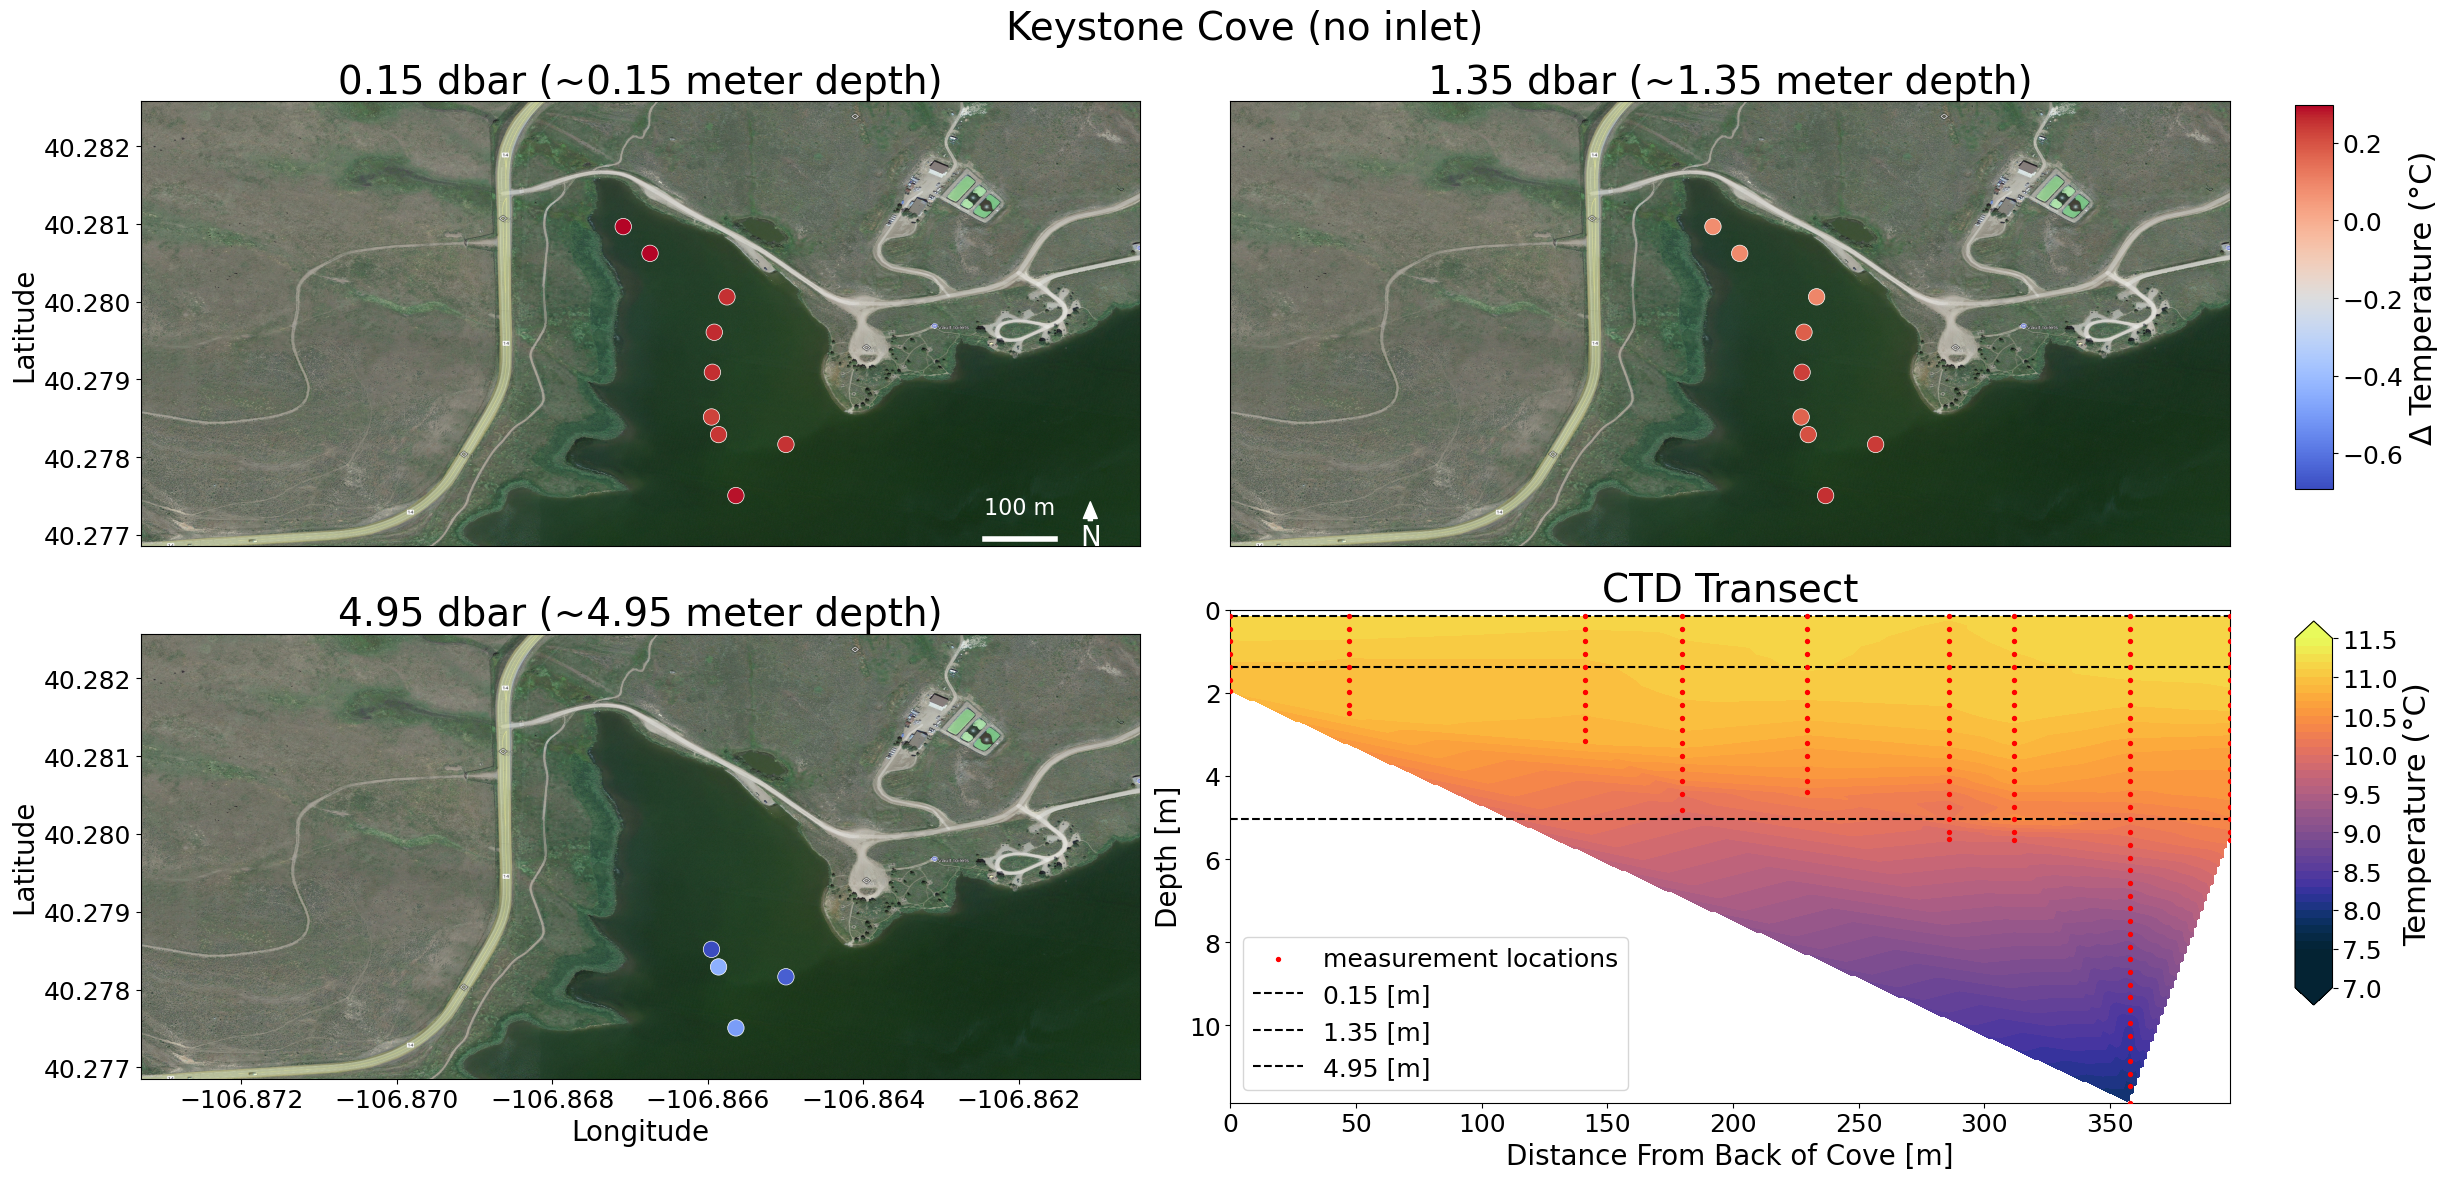

In [11]:
# Define datasets and titles
pressure_levels = [pressure_p15, pressure_1p35, pressure_4p95]  # Only 3 maps now
titles = ['0.15 dbar (~0.15 meter depth)', '1.35 dbar (~1.35 meter depth)', '4.95 dbar (~4.95 meter depth)']

# Find global min/max temperature for consistent color scaling
all_temps = pd.concat(pressure_levels)['meantemp']
vmin, vmax = all_temps.min(), all_temps.max()

fig, axs = plt.subplots(2, 2, figsize=(25, 12))

# Plot the first 3 scatter maps
scatter_mappable = None 
for ax, data, title in zip(axs.flat[:3], pressure_levels, titles):
    show(tif, ax=ax)
    sc = ax.scatter(
        data['Longitude'], data['Latitude'],
        c=data['meantemp'],
        cmap='coolwarm',
        s=140, edgecolor='white', linewidth=0.5,
        vmin=vmin, vmax=vmax
    )
    scatter_mappable = sc

    if ax == axs[0, 0]:  # Top-left plot only
        # North arrow
        ax.annotate(
            'N', xy=(0.95, 0.10), xytext=(0.95, 0.02),
            arrowprops=dict(facecolor='white', edgecolor='white', width=3, headwidth=10),
            color='white', ha='center', va='center', fontsize=20,
            xycoords='axes fraction'
        )

        # 100 meter scale bar
        scale_deg = 0.000899  # ≈ 100 m at 40°N
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Position near bottom right of the subplot
        x_start = xlim[1] - 0.002
        x_end   = x_start + scale_deg
        y_pos   = ylim[0] + 0.0001

        ax.plot([x_start, x_end], [y_pos, y_pos], color='white', linewidth=4, zorder=10)
        ax.text((x_start + x_end) / 2, y_pos + 0.00025, '100 m',
                ha='center', va='bottom', fontsize=16, color='white', zorder=10)

    ax.set_title(title, fontsize=28)

    idx = list(axs.flat).index(ax)
    row, col = divmod(idx, 2)

    if row == 1:
        ax.set_xlabel("Longitude", fontsize=20)
        ax.tick_params(axis='x', labelsize=18)
    else:
        ax.tick_params(axis='x', labelbottom=False, bottom=False)

    if col == 0:
        ax.set_ylabel("Latitude", fontsize=20)
        ax.tick_params(axis='y', labelsize=18)
    else:
        ax.tick_params(axis='y', labelleft=False, left=False)

    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)

# CTD Transect
ax_transect = axs[1, 1]
levels = np.arange(7, 11.51, 0.1)
cf = ax_transect.contourf(D, Z, T, levels=levels, extend='both', vmin=7.5, vmax=11.5, cmap=cmocean.cm.thermal)
ax_transect.scatter(df_KEY.distance_m, df_KEY['Depth (m)'], s=8, c='red', zorder=4, label='measurement locations')
ax_transect.invert_yaxis()
ax_transect.set_xlabel('Distance From Back of Cove [m]', fontsize=20)
ax_transect.set_ylabel('Depth [m]', fontsize=20)
ax_transect.set_title('CTD Transect', fontsize=28)
ax_transect.tick_params(axis='both', labelsize=18)
ax_transect.axhline(y=depth_at_015, color='black', linestyle='--', linewidth=1.5, label='0.15 [m]')
ax_transect.axhline(y=depth_at_1_35, color='black', linestyle='--', linewidth=1.5, label='1.35 [m]')
ax_transect.axhline(y=depth_at_4_95, color='black', linestyle='--', linewidth=1.5, label='4.95 [m]')
ax_transect.legend(fontsize=18)

# cbar for three plots
cbar_ax1 = fig.add_axes([0.92, 0.58, 0.015, 0.32])  # Adjusted top-right corner
cbar1 = fig.colorbar(scatter_mappable, cax=cbar_ax1)
cbar1.set_label("Δ Temperature (°C)", fontsize=22)
cbar1.ax.tick_params(labelsize=18)

# cbar for ctd transcet
cbar_ax2 = fig.add_axes([0.92, 0.15, 0.015, 0.32])  # Aligned with bottom-right plot
cbar2 = fig.colorbar(cf, cax=cbar_ax2)
cbar2.set_label("Temperature (°C)", fontsize=22)
cbar2.ax.tick_params(labelsize=18)

plt.suptitle("Keystone Cove (no inlet)", fontsize=28, y=.98)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Reserve space for colorbars
plt.show()
